# Predicting students marsk according to study hours. TSF GRIP TASK 1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1475803788e34729b1831b3dede7590b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='i8eVE4gfi0YB_qrm4SCl2h1aU25EsIFxt74Avm8eXYZx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1475803788e34729b1831b3dede7590b.get_object(Bucket='studentmarkspredictionaccordingto-donotdelete-pr-x3pyzyppeq0kiq',Key='student_scores - student_scores.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

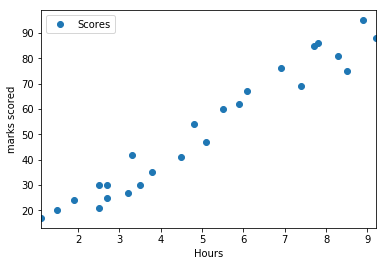

In [8]:
data.plot(x='Hours', y='Scores', style='o')
plt.xlabel('Hours')
plt.ylabel('marks scored')
plt.show()

In [18]:
#now identifying features and labels


X = data.iloc[:, :-1].values  
y =data.iloc[:, 1].values  



In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state= 0)
print(X_train)
print(y_train)


[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [36]:
from sklearn.linear_model import LinearRegression
regg = LinearRegression()
regg.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
Line = regg.coef_*X + regg.intercept_

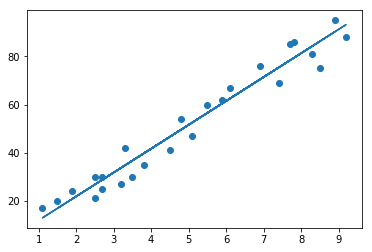

In [45]:
plt.scatter(X,y)
plt.plot(X, Line)
plt.show()

In [66]:
pred = regg.predict(X_test)
print(X_test)
print(pred)
print(y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
[20 27 69 30 62]


# Model EVALUATON

In [57]:
from sklearn import metrics
met = metrics.mean_absolute_error(y_test,pred)
met


4.183859899002975

# PREDICTION FOR 9.25 HOURS/DAY

In [68]:
hours = [[9.25]]
testcase = regg.predict(hours)
print(testcase)

[93.69173249]
